In [1]:
!wget https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

--2021-09-27 01:46:16--  https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz.7’

aclImdb_v1.tar.gz.7 100%[===================>]  80.23M  20.2MB/s    in 5.0s    

2021-09-27 01:46:21 (16.1 MB/s) - ‘aclImdb_v1.tar.gz.7’ saved [84125825/84125825]



In [2]:
!tar -xf aclImdb_v1.tar.gz

In [3]:
from glob import glob
pos_train = [(open(x).read(), 1) for x in glob('aclImdb/train/pos/*.txt')]
neg_train = [(open(x).read(), 0) for x in glob('aclImdb/train/neg/*.txt')]
X_train_text, y_train = zip(*(pos_train + neg_train))

pos_test = [(open(x).read(), 1) for x in glob('aclImdb/test/pos/*.txt')]
neg_test = [(open(x).read(), 0) for x in glob('aclImdb/test/neg/*.txt')]
X_test_text, y_test = zip(*(pos_test + neg_test))

import numpy as np
y_train, y_test = np.array(y_train), np.array(y_test)

In [4]:
X_train_text[0], y_train[0]

('Finally, after years of awaiting a new film to continue the sexual mayhem of "Basic Instinct", we have been given a great sequel that is packed with the right elements needed for a franchise such as this! I remember everything about the original, the steam, the romance, the sex, the interrogation, the music (by the master Jerry Goldsmith), and everything else from violence and murder, to intense confrontations of all kind! Make no mistake, "Basic Instinct" was a real winner for audiences everywhere. I can remember in 2001 when we were first given the news about such a sequel. Five years later, we have it. I never would have thought it to end up such as this. When it was declared a dropped project, time sure couldn\'t tell if it was ever a real possibility to begin with. Well, I guess we now know anything\'s possible in this case. Even if the original director, or writer are not present, all we need is the glamorous, always reliable Sharon Stone, and we have a done deal! Please, hear 

In [5]:
!wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
!gunzip GoogleNews-vectors-negative300.bin.gz

--2021-09-27 01:46:40--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.91.86
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.91.86|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

gzip: GoogleNews-vectors-negative300.bin already exists; do you wish to overwrite (y or n)? n
	not overwritten


In [6]:

from gensim.models import KeyedVectors
filename = 'GoogleNews-vectors-negative300.bin'
w2v = KeyedVectors.load_word2vec_format(filename, binary=True)
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
# takes a minute
X_train = [[w2v.get_vector(word) for word in word_tokenize(x) if word in w2v.vocab] for x in X_train_text]
X_test = [[w2v.get_vector(word) for word in word_tokenize(x) if word in w2v.vocab] for x in X_test_text]

X_train = np.array([np.array(x).mean(axis=0) for x in X_train])
X_test =  np.array([np.array(x).mean(axis=0) for x in X_test])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### **Decision Tree**

In [7]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_test_pred = tree_clf.predict(X_test)
confusion_matrix_valid = confusion_matrix(y_test, y_test_pred)
print(confusion_matrix_valid) 
y_train_pred = tree_clf.predict(X_train)
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

[[8370 4130]
 [4241 8259]]
Train score 1.0
Test score 0.66516


In [ ]:
from sklearn.model_selection import GridSearchCV 



param_test1 = {
  'max_depth':(2,10,100,200,500,1000),
  'max_features':(2,5,10,15,20,100),
}
gsearch1 = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = param_test1,scoring='accuracy', n_jobs=4, cv=5)
gsearch1.fit(X_train, y_train)
gsearch1.cv_results_

{'mean_fit_time': array([ 0.13825378,  0.13707108,  0.2346818 ,  0.3201427 ,  0.41125293,
         1.8458714 ,  0.20539598,  0.43431067,  0.79345202,  1.16298428,
         1.49593019,  7.29704647,  0.28697758,  0.56377439,  1.06250615,
         1.51651525,  2.03256302, 10.42461486,  0.29837985,  0.57829556,
         1.05961113,  1.52666054,  2.04503503, 10.26105556,  0.29038424,
         0.57216759,  1.02879076,  1.52487168,  2.03712602, 10.38486595,
         0.28587623,  0.58595009,  1.05072618,  1.54448404,  2.0218832 ,
         8.90304193]),
 'mean_score_time': array([0.00690246, 0.00725279, 0.0083096 , 0.00814366, 0.00741868,
        0.00801725, 0.00836873, 0.00657129, 0.0102663 , 0.01051278,
        0.01241922, 0.01273522, 0.01248612, 0.01224456, 0.01213551,
        0.0116755 , 0.0113338 , 0.01108198, 0.0109488 , 0.01251154,
        0.01242924, 0.01077933, 0.00882721, 0.01194453, 0.01148081,
        0.00865955, 0.01204309, 0.01077657, 0.00966449, 0.00917287,
        0.01233234, 0.

In [8]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=10,max_features=100)
tree_clf.fit(X_train, y_train)
y_test_pred = tree_clf.predict(X_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_test_pred = tree_clf.predict(X_test)
confusion_matrix_valid = confusion_matrix(y_test, y_test_pred)
print(confusion_matrix_valid) 
y_train_pred = tree_clf.predict(X_train)
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')


[[9164 3336]
 [4245 8255]]
Train score 0.86172
Test score 0.69676


In [ ]:
path = tree_clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas[1:20], len(ccp_alphas))

[3.42464040e-05 3.96765499e-05 4.01002506e-05 5.33333333e-05
 5.33333333e-05 5.33333333e-05 5.33333333e-05 6.00000000e-05
 6.00000000e-05 6.00000000e-05 6.00000000e-05 6.00000000e-05
 6.00000000e-05 6.00000000e-05 6.00000000e-05 6.00000000e-05
 6.00000000e-05 6.00000000e-05 6.00000000e-05] 617


In [ ]:
result = np.random.randint(len(ccp_alphas), size = (20))
result
#ccp_alphas = [ccp_alphas[x] for x in result ]
#ccp_alphas
result_sorted = []
for i in range(len(ccp_alphas)):
  for x in result:
   if i==x:
     result_sorted.append(ccp_alphas[x])


ccp_alphas=result_sorted     

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

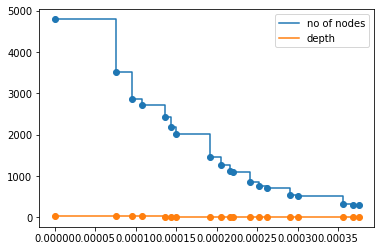

In [ ]:
import matplotlib.pyplot as plt
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

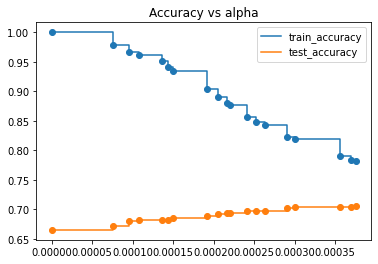

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(X_train)
    y_test_pred = c.predict(X_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

In [9]:
clf_ = DecisionTreeClassifier(random_state=0,ccp_alpha=0.00035)
clf_.fit(X_train,y_train)
y_train_pred = clf_.predict(X_train)
y_test_pred = clf_.predict(X_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_test_pred = clf_.predict(X_test)
y_train_pred = clf_.predict(X_train)
confusion_matrix_valid = confusion_matrix(y_test, y_test_pred)
print(confusion_matrix_valid) 
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')



[[8699 3801]
 [3632 8868]]
Train score 0.79232
Test score 0.70268


In [10]:
clf_ = DecisionTreeClassifier(random_state=0,ccp_alpha=0.0004)
clf_.fit(X_train,y_train)
y_train_pred = clf_.predict(X_train)
y_test_pred = clf_.predict(X_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_test_pred = clf_.predict(X_test)
y_train_pred = clf_.predict(X_train)
confusion_matrix_valid = confusion_matrix(y_test, y_test_pred)
print(confusion_matrix_valid) 
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

[[8819 3681]
 [3714 8786]]
Train score 0.77328
Test score 0.7042


### **Neural Networks**

In [ ]:
from tensorflow import keras
model = keras.models.Sequential([   
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(2, activation="sigmoid")
])

In [ ]:

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=30)

Epoch 1/30
782/782 [==============================] - 3s 2ms/step - loss: 0.6843 - accuracy: 0.6502
Epoch 2/30
782/782 [==============================] - 2s 2ms/step - loss: 0.6699 - accuracy: 0.7032
Epoch 3/30
782/782 [==============================] - 2s 2ms/step - loss: 0.6488 - accuracy: 0.7194
Epoch 4/30
782/782 [==============================] - 2s 2ms/step - loss: 0.6155 - accuracy: 0.7314
Epoch 5/30
782/782 [==============================] - 2s 2ms/step - loss: 0.5707 - accuracy: 0.7526
Epoch 6/30
782/782 [==============================] - 2s 2ms/step - loss: 0.5194 - accuracy: 0.7758
Epoch 7/30
782/782 [==============================] - 2s 2ms/step - loss: 0.4726 - accuracy: 0.8004
Epoch 8/30
782/782 [==============================] - 2s 3ms/step - loss: 0.4374 - accuracy: 0.8118
Epoch 9/30
782/782 [==============================] - 2s 2ms/step - loss: 0.4159 - accuracy: 0.8212
Epoch 10/30
782/782 [==============================] - 2s 3ms/step - loss: 0.4002 - accuracy: 0.8274

In [ ]:
model.evaluate(X_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.3553 - accuracy: 0.8455


[0.35528135299682617, 0.84552001953125]

In [ ]:
from tensorflow.keras.optimizers import SGD, Adam, Adagrad, RMSprop
import tensorflow.keras.backend as K

dflist = []

optimizers = ['SGD(learning_rate=0.01)',
              'SGD(learning_rate=0.01, momentum=0.3)',
              'SGD(learning_rate=0.01, momentum=0.3, nesterov=True)',  
              'Adam(learning_rate=0.01)',
              'Adagrad(learning_rate=0.01)',
              'RMSprop(learning_rate=0.01)']

for opt_name in optimizers:

    K.clear_session()    
    model = keras.models.Sequential([   
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(3, activation="sigmoid")])    
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=eval(opt_name),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=0)    
    print(opt_name)
    print(model.evaluate(X_test, y_test))

SGD(learning_rate=0.01)
782/782 [==============================] - 1s 2ms/step - loss: 0.4157 - accuracy: 0.8184
[0.41568222641944885, 0.8184400200843811]
SGD(learning_rate=0.01, momentum=0.3)
782/782 [==============================] - 1s 2ms/step - loss: 0.3727 - accuracy: 0.8412
[0.3727352023124695, 0.8411999940872192]
SGD(learning_rate=0.01, momentum=0.3, nesterov=True)
782/782 [==============================] - 1s 1ms/step - loss: 0.3850 - accuracy: 0.8310
[0.3850448429584503, 0.8309599757194519]
Adam(learning_rate=0.01)
782/782 [==============================] - 1s 1ms/step - loss: 0.3472 - accuracy: 0.8547
[0.3472214937210083, 0.8546800017356873]
Adagrad(learning_rate=0.01)
782/782 [==============================] - 1s 2ms/step - loss: 0.3614 - accuracy: 0.8448
[0.3613734841346741, 0.8447999954223633]
RMSprop(learning_rate=0.01)
782/782 [==============================] - 1s 2ms/step - loss: 0.4849 - accuracy: 0.7992
[0.4849421977996826, 0.7991999983787537]


In [ ]:
from tensorflow.keras.optimizers import SGD, Adam, Adagrad, RMSprop
import tensorflow.keras.backend as K

dflist = []

batch_sizes = [16, 32, 64, 128,1000]

for batch_size in batch_sizes:
    K.clear_session()    
    model = keras.models.Sequential([   
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(3, activation="sigmoid")])    

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=batch_size, verbose=0, epochs=10)
    print(batch_size)
    print(model.evaluate(X_test, y_test))

16
782/782 [==============================] - 1s 2ms/step - loss: 0.3773 - accuracy: 0.8315
[0.3772980868816376, 0.8314800262451172]
32
782/782 [==============================] - 1s 2ms/step - loss: 0.4114 - accuracy: 0.8216
[0.41137295961380005, 0.8216400146484375]
64
782/782 [==============================] - 1s 1ms/step - loss: 0.5558 - accuracy: 0.7504
[0.5557552576065063, 0.7504000067710876]
128
782/782 [==============================] - 1s 2ms/step - loss: 0.6583 - accuracy: 0.6883
[0.6583298444747925, 0.6882799863815308]
1000
782/782 [==============================] - 1s 2ms/step - loss: 0.7482 - accuracy: 0.5440
[0.7481630444526672, 0.5440000295639038]


In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import BatchNormalization
model = keras.models.Sequential([   
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(3, activation="sigmoid")
])
model.add(BatchNormalization())
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10)
model.evaluate(X_test, y_test)


Epoch 1/10
782/782 [==============================] - 3s 3ms/step - loss: 0.6797 - accuracy: 0.6531
Epoch 2/10
782/782 [==============================] - 2s 3ms/step - loss: 0.5317 - accuracy: 0.7709
Epoch 3/10
782/782 [==============================] - 2s 3ms/step - loss: 0.5067 - accuracy: 0.7934
Epoch 4/10
782/782 [==============================] - 2s 2ms/step - loss: 0.4814 - accuracy: 0.8101
Epoch 5/10
782/782 [==============================] - 2s 2ms/step - loss: 0.6382 - accuracy: 0.6598
Epoch 6/10
782/782 [==============================] - 2s 2ms/step - loss: 0.5960 - accuracy: 0.6586
Epoch 7/10
782/782 [==============================] - 2s 3ms/step - loss: 0.6338 - accuracy: 0.6635
Epoch 8/10
782/782 [==============================] - 2s 2ms/step - loss: 0.6752 - accuracy: 0.7146
Epoch 9/10
782/782 [==============================] - 2s 2ms/step - loss: 0.5492 - accuracy: 0.7571
Epoch 10/10
782/782 [==============================] - 1s 2ms/step - loss: 0.7263 - accuracy: 0.5396

[0.7263438105583191, 0.5396000146865845]

In [ ]:
dflist = []

learning_rates = [.001,0.01, 0.05, 0.1, 0.5,1]

for learning_rate in learning_rates:
    K.clear_session()    
    model = keras.models.Sequential([   
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(3, activation="sigmoid")])    

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=SGD(learning_rate=learning_rate),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=128, verbose=0, epochs=10)
    print(learning_rate)
    print(model.evaluate(X_test, y_test))

0.001
782/782 [==============================] - 1s 2ms/step - loss: 0.7603 - accuracy: 0.5020
[0.760288417339325, 0.5019599795341492]
0.01
782/782 [==============================] - 1s 1ms/step - loss: 0.6605 - accuracy: 0.7058
[0.6605491638183594, 0.7057999968528748]
0.05
782/782 [==============================] - 1s 1ms/step - loss: 0.4037 - accuracy: 0.8282
[0.4036611318588257, 0.8281599879264832]
0.1
782/782 [==============================] - 1s 1ms/step - loss: 0.5102 - accuracy: 0.7436
[0.5101847052574158, 0.7435600161552429]
0.5
782/782 [==============================] - 1s 1ms/step - loss: 0.4057 - accuracy: 0.8159
[0.4056662917137146, 0.8158800005912781]
1
782/782 [==============================] - 1s 1ms/step - loss: 0.4490 - accuracy: 0.8206
[0.4489521384239197, 0.8206400275230408]


In [ ]:
dflist = []

initializers = ['zeros', 
                'uniform', 
                'normal',
                'he_normal', 
                'lecun_uniform']

for initializers in initializers:
    K.clear_session()    
    model = keras.models.Sequential([   
    keras.layers.Dense(300, activation="relu",kernel_initializer=initializers),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(3, activation="sigmoid")])    

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=SGD(learning_rate=learning_rate),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=128, verbose=0, epochs=10)
    print(initializers)
    print(model.evaluate(X_test, y_test))


zeros
782/782 [==============================] - 1s 1ms/step - loss: 0.6938 - accuracy: 0.5000
[0.693824052810669, 0.5]
uniform
782/782 [==============================] - 1s 2ms/step - loss: 0.4032 - accuracy: 0.8271
[0.40319058299064636, 0.8270800113677979]
normal
782/782 [==============================] - 1s 1ms/step - loss: 0.5324 - accuracy: 0.8187
[0.5324090123176575, 0.8186799883842468]
he_normal
782/782 [==============================] - 1s 2ms/step - loss: 0.6350 - accuracy: 0.5684
[0.6350083351135254, 0.5684400200843811]
lecun_uniform
782/782 [==============================] - 1s 1ms/step - loss: 0.4382 - accuracy: 0.8158
[0.4381895959377289, 0.8158400058746338]


### **Boosting**

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [17]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_train_pred = ada_clf.predict(X_train)
y_test_pred = ada_clf.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

Train score 0.84108
Test score 0.81948


In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=50,
    algorithm="SAMME.R", learning_rate=1, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [19]:
y_train_pred = ada_clf.predict(X_train)
y_test_pred = ada_clf.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

Train score 0.8052
Test score 0.79068


In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=100,
    algorithm="SAMME.R", learning_rate=5, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [21]:
y_train_pred = ada_clf.predict(X_train)
y_test_pred = ada_clf.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

Train score 0.35888
Test score 0.37044


In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=50,
    algorithm="SAMME.R", learning_rate=.01, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [23]:
y_train_pred = ada_clf.predict(X_train)
y_test_pred = ada_clf.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

Train score 0.69592
Test score 0.6854


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=100,
    algorithm="SAMME.R", learning_rate=1, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [25]:
y_train_pred = ada_clf.predict(X_train)
y_test_pred = ada_clf.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

Train score 0.82684
Test score 0.80648


https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html


### **SVM**

In [27]:
from sklearn.svm import SVC

final = SVC()
final.fit(X_train, y_train)
y_train_pred= final.predict(X_train)
y_test_pred = final.predict(X_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

confusion_matrix_valid = confusion_matrix(y_test, y_test_pred)
print(confusion_matrix_valid) 
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

[[10728  1772]
 [ 1764 10736]]
Train score 0.86852
Test score 0.85856


In [11]:
## Polynomial Kernel

from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

poly100_kernel_svm_clf = Pipeline([
        ("svm_clf", SVC(kernel="poly", degree=2, coef0=100, C=5,cache_size=200000))
    ])
poly100_kernel_svm_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200000,
                     class_weight=None, coef0=100,
                     decision_function_shape='ovr', degree=2, gamma='scale',
                     kernel='poly', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_test_pred = poly100_kernel_svm_clf.predict(X_test)
y_train_pred= poly100_kernel_svm_clf.predict(X_train)



In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(confusion_matrix_valid, accuracy_score) 
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

[[8819 3681]
 [3714 8786]] <function accuracy_score at 0x7f328ec3c170>
Train score 0.87744
Test score 0.85836


### **kNN**

In [14]:
from sklearn.neighbors import KNeighborsClassifier



knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_test_pred = knn.predict(X_test)
confusion_matrix_valid = confusion_matrix(y_test, y_test_pred)
accuracy_score = accuracy_score(y_test, y_test_pred)
print(confusion_matrix_valid, accuracy_score) 

[[10058  2442]
 [ 3902  8598]] 0.74624


In [16]:
y_train_pred= knn.predict(X_train)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(confusion_matrix_valid, accuracy_score) 
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

[[10058  2442]
 [ 3902  8598]] <function accuracy_score at 0x7f328ec3c170>
Train score 0.84412
Test score 0.74624


In [17]:
from sklearn.neighbors import KNeighborsClassifier


param_knn = {}
param_knn['n_neighbors'] = 5
param_knn['leaf_size'] = 25

knn = KNeighborsClassifier(**param_knn)
knn.fit(X_train,y_train)

y_test_pred = knn.predict(X_test)
y_train_pred= knn.predict(X_train)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

Train score 0.84412
Test score 0.74624
